In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('data/SCADA/features_T.csv')
labels = pd.read_csv('data/SCADA/labels_T.csv')
conditions = pd.read_csv('data/SCADA/condition_T.csv')

In [20]:
print(features.columns)
print(conditions.columns)
print(labels.columns)

Index(['Unnamed: 0', 'Rotordrehzahl', 'Leistung', 'Generator_Umdr', 'T_Aussen',
       'T_Gen1', 'T_Gen2', 'T_Getriebe', 'T_Getriebelager', 'T_Wellenlager',
       'Drehmoment', 'Triebstrangbeschl', 'T_Generatorkuehlluft',
       'T_Getriebelager_B', 'condition'],
      dtype='object')
Index(['0.000000000000000000e+00'], dtype='object')
Index(['Unnamed: 0', 'Fehler_051', 'Fehler_052', 'Fehler_071', 'Fehler_072',
       'Fehler_077', 'Fehler_089', 'Fehler_098', 'Fehler_425'],
      dtype='object')


In [28]:
labels[labels==1].count()

Unnamed: 0      1
Fehler_051     13
Fehler_052    482
Fehler_071     32
Fehler_072      4
Fehler_077    208
Fehler_089     33
Fehler_098      5
Fehler_425      1
dtype: int64

,Unnamed: 0,Fehler_051,Fehler_052,Fehler_071,Fehler_072,Fehler_077,Fehler_089,Fehler_098,Fehler_425
94497,94497,0,0,0,0,1,0,1,0
230647,230647,0,0,0,0,0,0,1,0
230815,230815,0,0,0,0,0,0,1,0
239361,239361,0,0,0,0,1,0,1,0
572112,572112,0,0,0,0,0,0,1,0


In [6]:
features.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B
0,0,0.388821,-0.262396,0.372827,-0.182108,0.349576,0.333813,0.129720,0.253259,0.253259,-0.193027,-0.458352,0.314737,0.738088
1,1,0.390541,0.055554,0.372999,-0.243631,0.597289,0.568279,0.159978,0.253259,0.253259,0.294183,-0.358655,0.482893,0.738088
2,2,0.393981,0.101523,0.377180,-0.454949,0.575339,0.559795,0.241788,0.253259,0.253259,0.359708,-0.445023,0.293718,0.738088
3,3,0.414623,0.155153,0.397264,-0.583345,0.477352,0.467243,0.241788,0.253259,0.253259,0.425233,-0.330399,0.149900,0.738088
4,4,0.462787,0.247091,0.446921,-0.583345,0.380932,0.375462,0.309028,0.253259,0.253259,0.536731,-0.418366,0.025996,0.738088


In [10]:
#cond_feature=features+conditions

#cond_feature.head()

cond_f = features
cond_f['condition']=conditions

In [11]:
cond_f.describe()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition
count,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860383e+06,1.860382e+06
mean,9.301910e+05,-1.504455e-11,-4.303942e-12,-2.431584e-13,-8.707261e-12,-7.306313e-13,3.746379e-12,5.459483e-15,4.313273e-12,4.313273e-12,-7.582819e-12,2.400482e-13,4.243789e-11,-4.355783e-11,1.311559e-04
std,5.370465e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.145158e-02
min,0.000000e+00,-1.685663e+00,-7.872065e-01,-1.689376e+00,-3.525746e+00,-3.613832e+00,-3.594264e+00,-4.969349e+00,-4.097301e+00,-4.097301e+00,-8.995342e-01,-1.062660e+00,-4.457798e+00,-1.581948e+00,0.000000e+00
25%,4.650955e+05,-9.167623e-01,-6.799460e-01,-9.179087e-01,-7.170903e-01,-4.680339e-01,-4.490256e-01,-3.185496e-01,-7.507164e-01,-7.507164e-01,-8.223838e-01,-6.915980e-01,-5.371061e-01,-1.536458e+00,0.000000e+00
50%,9.301910e+05,3.698993e-01,-3.581646e-01,3.725409e-01,-4.836268e-02,4.463793e-02,3.147546e-02,3.538551e-01,8.258304e-02,8.258304e-02,-3.150937e-01,-3.141386e-01,1.825154e-02,7.380879e-01,0.000000e+00
75%,1.395286e+06,5.109504e-01,2.087836e-01,5.107441e-01,7.541104e-01,5.126273e-01,5.004075e-01,4.659226e-01,7.552465e-01,7.552465e-01,4.532394e-01,4.109247e-01,6.145419e-01,7.380879e-01,0.000000e+00
max,1.860382e+06,1.780411e+00,5.219380e+00,1.756119e+00,4.900221e+00,6.028945e+00,6.153815e+00,3.875014e+00,3.432514e+00,3.432514e+00,5.878073e+00,1.598113e+01,5.494387e+00,9.655425e-01,1.000000e+00


In [32]:
labels.loc[labels['Fehler_098']==1]

,Unnamed: 0,Fehler_051,Fehler_052,Fehler_071,Fehler_072,Fehler_077,Fehler_089,Fehler_098,Fehler_425
94497,94497,0,0,0,0,1,0,1,0
230647,230647,0,0,0,0,0,0,1,0
230815,230815,0,0,0,0,0,0,1,0
239361,239361,0,0,0,0,1,0,1,0
572112,572112,0,0,0,0,0,0,1,0


In [13]:
cond_f.loc[cond_f['condition'] == 1]

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition
49692,49692,-1.685663,-0.683777,-1.689376,-1.252072,-3.143491,-3.054375,-4.689180,-2.925996,-2.925996,-0.832952,-1.062660,-3.462137,0.738088,1.0
49695,49695,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
49699,49699,-1.685663,-0.679946,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832424,-1.062660,-3.351508,0.738088,1.0
49701,49701,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
49705,49705,-1.685663,-0.683777,-1.689376,-1.003306,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794586,1794586,1.737407,5.108289,1.742125,0.952054,5.788287,5.890041,3.295626,0.815485,0.815485,4.383153,6.006174,4.892565,-0.399185,1.0
1794600,1794600,1.728807,4.824814,1.732503,1.021601,5.456696,5.536799,3.324763,1.089905,1.089905,4.131621,5.482369,4.826188,-0.399185,1.0
1794611,1794611,1.711605,4.660093,1.715358,1.155347,5.704409,5.799802,3.383038,1.257234,1.257234,3.993702,4.314804,5.056296,-0.399185,1.0
1797756,1797756,1.737407,5.184903,1.741571,0.612340,5.520193,5.630894,3.350539,0.420588,0.420588,4.449206,5.509559,4.579485,-0.399185,1.0


In [14]:
err_matrix = cond_f.loc[cond_f['condition'] == 1]

err_matrix.reset_index(drop=True, inplace = True)
err_matrix

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition
0,49692,-1.685663,-0.683777,-1.689376,-1.252072,-3.143491,-3.054375,-4.689180,-2.925996,-2.925996,-0.832952,-1.062660,-3.462137,0.738088,1.0
1,49695,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
2,49699,-1.685663,-0.679946,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832424,-1.062660,-3.351508,0.738088,1.0
3,49701,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
4,49705,-1.685663,-0.683777,-1.689376,-1.003306,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1794586,1.737407,5.108289,1.742125,0.952054,5.788287,5.890041,3.295626,0.815485,0.815485,4.383153,6.006174,4.892565,-0.399185,1.0
240,1794600,1.728807,4.824814,1.732503,1.021601,5.456696,5.536799,3.324763,1.089905,1.089905,4.131621,5.482369,4.826188,-0.399185,1.0
241,1794611,1.711605,4.660093,1.715358,1.155347,5.704409,5.799802,3.383038,1.257234,1.257234,3.993702,4.314804,5.056296,-0.399185,1.0
242,1797756,1.737407,5.184903,1.741571,0.612340,5.520193,5.630894,3.350539,0.420588,0.420588,4.449206,5.509559,4.579485,-0.399185,1.0


In [15]:
good_matrix = cond_f.loc[cond_f['condition'] == 0]

good_matrix.reset_index(drop=True, inplace = True)
good_matrix

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition
0,0,0.388821,-0.262396,0.372827,-0.182108,0.349576,0.333813,0.129720,0.253259,0.253259,-0.193027,-0.458352,0.314737,0.738088,0.0
1,1,0.390541,0.055554,0.372999,-0.243631,0.597289,0.568279,0.159978,0.253259,0.253259,0.294183,-0.358655,0.482893,0.738088,0.0
2,2,0.393981,0.101523,0.377180,-0.454949,0.575339,0.559795,0.241788,0.253259,0.253259,0.359708,-0.445023,0.293718,0.738088,0.0
3,3,0.414623,0.155153,0.397264,-0.583345,0.477352,0.467243,0.241788,0.253259,0.253259,0.425233,-0.330399,0.149900,0.738088,0.0
4,4,0.462787,0.247091,0.446921,-0.583345,0.380932,0.375462,0.309028,0.253259,0.253259,0.536731,-0.418366,0.025996,0.738088,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860133,1860377,0.717367,0.687625,0.719051,-0.984581,-0.232863,-0.141289,0.474888,-1.754692,-1.754692,0.906630,1.036558,-0.680924,-0.399185,0.0
1860134,1860378,0.961626,1.216266,0.965236,-0.984581,-0.149770,-0.087300,0.534284,-1.754692,-1.754692,1.318275,1.556098,-0.585783,-0.399185,0.0
1860135,1860379,0.801653,0.898315,0.804084,-0.984581,-0.063541,-0.006317,0.577990,-1.754692,-1.754692,1.057760,1.356706,-0.503917,-0.399185,0.0
1860136,1860380,0.842937,0.971099,0.846506,-0.984581,-0.040807,0.002167,0.506267,-1.754692,-1.754692,1.129098,1.394025,-0.475154,-0.399185,0.0


In [16]:
# save the data
err_matrix.to_csv('data/SCADA/error_f.csv', index=False)

good_matrix.to_csv('data/SCADA/good_f.csv', index=False)

# Hist Plots

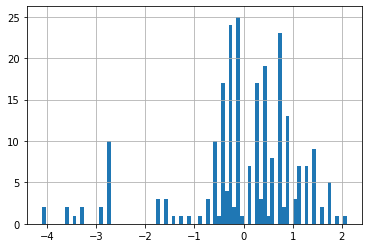

In [17]:
err_matrix['T_Getriebelager'].hist(bins=80)

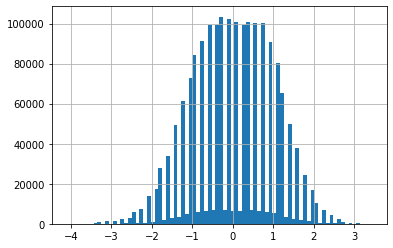

In [18]:
good_matrix['T_Getriebelager'].hist(bins=80)

# for Fehler_098